# DNN

### 상수 값으로 풀어보는 XOR  예제

![xor_nn_1](https://user-images.githubusercontent.com/661959/54298177-9e82f080-45fb-11e9-8bdd-1f86718c6f5d.png)




In [5]:
import tensorflow as tf
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
Y = np.array([[0], [1], [1], [0]], dtype=np.float32)


W1 = tf.Variable(np.array([[5,-7], [5,-7]], dtype=np.float32), name='weight1')
b1 = tf.Variable(np.array([[-8, 3]], dtype=np.float32), name='bias1')
L1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(np.array([[-11],[-11]], dtype=np.float32), name='weight2')
b2 = tf.Variable(np.array([6], dtype=np.float32), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(L1, W2) + b2)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

print(f"\nHypothesis:\n{hypothesis} \nPredicted:\n{predicted} \nAccuracy:\n{accuracy}")

tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)
tf.Tensor(
[[ True]
 [ True]
 [ True]
 [ True]], shape=(4, 1), dtype=bool)

Hypothesis:
[[0.01118422]
 [0.99493575]
 [0.99493575]
 [0.02438853]] 
Predicted:
[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:
1.0


#### XOR 문제 MLP 학습 예제
* 앞서 상수로 풀었던 XOR 문제를 MLP 학습으로 해결

In [6]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

W1 = tf.Variable(tf.random.normal([2, 2], seed=0))
b1 = tf.Variable(tf.random.normal([2], seed=0))

W2 = tf.Variable(tf.random.normal([2, 1], seed=0))
b2 = tf.Variable(tf.random.normal([1], seed=0))

learning_rate = 0.001
opt = tf.keras.optimizers.Adam(learning_rate)
for step in range(10001):
    with tf.GradientTape() as tape:
        layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
        hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
        cost = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y, hypothesis))
        d_W1, d_b1, d_W2, d_b2 = tape.gradient(cost, [W1, b1, W2, b2] )
        
        opt.apply_gradients(zip([d_W1, d_b1, d_W2, d_b2], [W1, b1, W2, b2]))
        if step % 500 == 0:
            print(f"step:{step},\t cost:{cost}")

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

print(f"Hypothesis:{hypothesis} \nPredicted:{predicted} \nAccuracy:{accuracy}")
print(f"w1:{W1.numpy()}, b1:{b1.numpy()}, w2:{W2.numpy()}, b2{b2.numpy()}")


step:0,	 cost:0.694770336151123
step:500,	 cost:0.6866353750228882
step:1000,	 cost:0.6217808723449707
step:1500,	 cost:0.47173699736595154
step:2000,	 cost:0.35258468985557556
step:2500,	 cost:0.2675658166408539
step:3000,	 cost:0.20677727460861206
step:3500,	 cost:0.1624651551246643
step:4000,	 cost:0.12943826615810394
step:4500,	 cost:0.1043068990111351
step:5000,	 cost:0.08483567833900452
step:5500,	 cost:0.06951884180307388
step:6000,	 cost:0.05731650069355965
step:6500,	 cost:0.04749320447444916
step:7000,	 cost:0.03951641544699669
step:7500,	 cost:0.03299262374639511
step:8000,	 cost:0.02762536332011223
step:8500,	 cost:0.02318764105439186
step:9000,	 cost:0.019503306597471237
step:9500,	 cost:0.016433611512184143
step:10000,	 cost:0.013868434354662895
Hypothesis:[[0.01419488]
 [0.99258196]
 [0.97974145]
 [0.01317781]] 
Predicted:[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:1.0
w1:[[ 7.0601707  7.736848 ]
 [-6.882331  -8.0927305]], b1:[ 4.0750833 -3.9460294], w2:[[-10.040942]
 [  8.642284

###  MNIST 손글씨 인식 실습


<class 'tuple'> 2
(60000, 28, 28) (10000,)
(10000, 28, 28) (10000,)
[5 0 4 1 9]


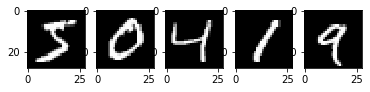

In [1]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist.load_data()
print(type(mnist), len(mnist))

(X_train, y_train), (X_test, y_test) = mnist
print(X_train.shape, y_test.shape)
print(X_test.shape, y_test.shape)

print(y_train[:5])
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i], cmap="gray")


### Data preprocessing
* 정규화(Normalization)
    * 픽셀 데이타 : 0 ~ 255
    * 정규화 데이타 : 0 ~ 1  
* 2차원 이미지를 1차원으로 변경
    * (28,28)
    * (784)

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
#(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

(X_train, X_test) = (np.float32(X_train)/255, np.float32(X_test)/255)

n_input = 28*28
(X_train, X_test) = (X_train.reshape(-1, n_input), X_test.reshape(-1, n_input))


### Validation Set


In [3]:
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000].astype(np.int64), y_train[5000:].astype(np.int64)

### Neural Net 설계
* 입력 : 28*28
* layer1 : 300
* layer2 : 100
* 출력 : 10

In [4]:
n_input = 28*28
n_L1 = 300
n_L2 = 100
n_output = 10

var_list = None

def build_model():
    global var_list
    #initializer =  tf.initializers.GlorotUniform() #xavier
    initializer =  tf.initializers.he_normal() #xavier

    W1 = tf.Variable(initializer([n_input, n_L1]))
    b1 = tf.Variable(tf.zeros([n_L1]))

    W2 = tf.Variable(initializer([n_L1, n_L2]))
    b2 = tf.Variable(tf.zeros([n_L2]))

    W3 = tf.Variable(initializer([n_L2, n_output]))
    b3 = tf.Variable(tf.zeros([n_output]))
    var_list = [W1,b1, W2, b2, W3, b3]

def fit(X):
    global var_list
    (W1, b1, W2, b2, W3, b3) = var_list
    
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
    h = tf.nn.softmax(tf.matmul(L2, W3) + b3)
    return h

In [5]:
learning_rate = 0.001
opt = tf.keras.optimizers.Adam(learning_rate)

build_model()
hist_cost , hist_vcost, hist_acc, hist_vacc = ([],[],[],[])

n_epochs = 301
for epoch in range(n_epochs):
    with tf.GradientTape() as tape:
        h = fit(X_train)
        cost = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_train, h))
        
        grad_list = tape.gradient(cost, var_list)
    opt.apply_gradients(zip(grad_list, var_list))

    is_correct = tf.equal(tf.argmax(h, axis=1), y_train)
    acc = tf.reduce_mean(tf.cast(is_correct, tf.float32))                              

    vh = fit(X_valid)
    vcost = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_valid, vh))
    is_correct = tf.equal(tf.argmax(vh, axis=1), y_valid)
    vacc = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    
    
    if epoch % 20 == 0:
        hist_cost.append(cost)
        hist_vcost.append(vcost)
        hist_acc.append(acc)
        hist_vacc.append(vacc)
        print(f"epoch:{epoch:3}, cost:{cost:.10f}, val cost:{vcost:.10f}, acc:{acc*100:5.2f}%, val acc:{vacc*100:5.2f}%")

predict = fit(X_test)
is_correct = tf.equal(tf.argmax(predict, axis=1), y_test)
acc_test = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print(f"Test Accuracy:{acc_test*100:5.2f}%")


epoch:  0, cost:2.3563389778, val cost:2.0806164742, acc:12.35%, val acc:30.10%
epoch: 20, cost:0.3665255606, val cost:0.3332101703, acc:89.55%, val acc:90.50%
epoch: 40, cost:0.2394082546, val cost:0.2231881320, acc:93.21%, val acc:93.78%
epoch: 60, cost:0.1811727583, val cost:0.1721808314, acc:94.96%, val acc:95.12%
epoch: 80, cost:0.1418341249, val cost:0.1424080580, acc:96.12%, val acc:96.08%
epoch:100, cost:0.1121805236, val cost:0.1212645993, acc:96.94%, val acc:96.70%
epoch:120, cost:0.0892205238, val cost:0.1060983017, acc:97.62%, val acc:97.06%
epoch:140, cost:0.0712269172, val cost:0.0946862698, acc:98.15%, val acc:97.30%
epoch:160, cost:0.0570849031, val cost:0.0871831998, acc:98.56%, val acc:97.54%
epoch:180, cost:0.0459050722, val cost:0.0821645111, acc:98.90%, val acc:97.62%
epoch:200, cost:0.0371201113, val cost:0.0790077001, acc:99.16%, val acc:97.72%
epoch:220, cost:0.0301375985, val cost:0.0773171037, acc:99.37%, val acc:97.82%
epoch:240, cost:0.0244768206, val cost:0

### MNIST 손글씨 인식 실습 – Keras Model

In [16]:
def make_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(n_L1, activation=tf.nn.relu, input_shape=(n_input,)),
        tf.keras.layers.Dense(n_L2, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(n_output, activation=tf.nn.softmax)])
    model.summary()
    return model

model = make_model()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=5,
                    validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 33us/sample - loss: 0.4080 - accuracy: 0.8784 - val_loss: 0.1545 - val_accuracy: 0.9556
Epoch 2/5
48000/48000 [=========================

#### predict

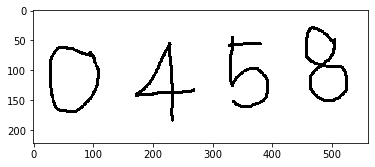

(1, 784)
[[9.89431739e-01 2.72225807e-05 4.31229128e-03 1.11697336e-04
  1.84069539e-03 5.17279608e-04 1.15703256e-03 5.62637288e-04
  2.83647416e-04 1.75582350e-03]] [0]
(1, 784)
[[2.7392076e-03 3.2389378e-03 4.0070568e-03 2.6232630e-04 9.6405679e-01
  1.5611033e-03 5.7980232e-03 7.2664684e-03 3.7859796e-04 1.0691559e-02]] [4]
(1, 784)
[[8.4816562e-03 3.5229741e-04 5.2944029e-04 8.6539248e-03 1.1959266e-03
  9.0108484e-01 2.5104955e-02 9.2065916e-04 3.6929246e-02 1.6747175e-02]] [5]
(1, 784)
[[7.6272218e-03 1.0600236e-03 2.2682259e-03 1.7695397e-02 5.9553245e-03
  4.0289886e-02 1.4743563e-02 7.3131232e-04 8.7647414e-01 3.3154923e-02]] [8]


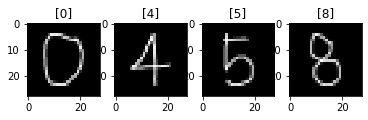

In [17]:
import numpy as np
import cv2
import img2data

img_path = './img/0458.png'

image = cv2.imread(img_path)
plt.imshow(image)
plt.show()

numbers = img2data.img2digits(image, (28,28), border=4)
for i, n in enumerate(numbers):
    print(n.shape)
    
    Z = model.predict(n.astype(np.float32)/255.0)
    
    pred = np.argmax(Z, axis=1)
    print(Z, pred)
    plt.subplot(1, len(numbers), i+1)
    plt.title(str(pred))
    plt.imshow(n.reshape(28,28), cmap="gray")